# Contents:
* Introduction 
* Importing the libraries
* Reading Data
* Data preprocessing
* Exploratory data analysis
* Building ML models
* Comparing the models to find the best model

# Introduction


# Import the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking/hotel_booking.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reading the data from the csv file

In [3]:
df = pd.read_csv('../input/hotel-booking/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Data Preprocessing

isnull() method is used to find the null values in the dataset

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From the data it is evident that most of the company values are null so lets get rid of that column. 

In [5]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

As most of the children values are 0, lets fill the missing values with 0.

In [6]:
df = df.drop('company',axis=1)
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Exploratory data anlysis

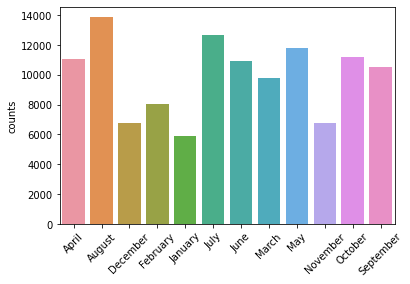

In [8]:
counts = df.arrival_date_month.value_counts()
counts.sort_index(inplace=True)
sns.barplot(x = counts.index, y = counts)
plt.ylabel('counts')
plt.xticks(rotation=45);

Text(0, 0.5, 'counts')

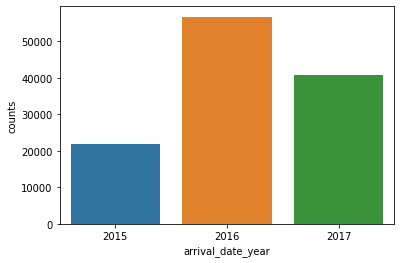

In [9]:
counts = df.arrival_date_year.value_counts()
counts.sort_index(inplace=True)
sns.barplot(x = counts.index, y = counts)
plt.xlabel('arrival_date_year')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

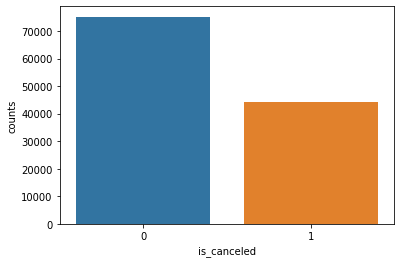

In [10]:
counts = df.is_canceled.value_counts()
counts.sort_index(inplace=True)
sns.barplot(x = counts.index, y = counts)
plt.xlabel('is_canceled')
plt.ylabel('counts')

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

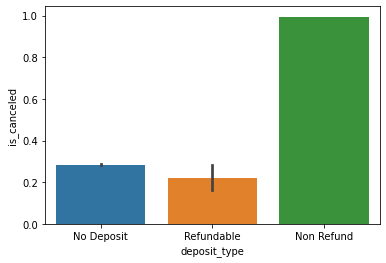

In [11]:
sns.barplot(y="is_canceled", x="deposit_type", data=df)

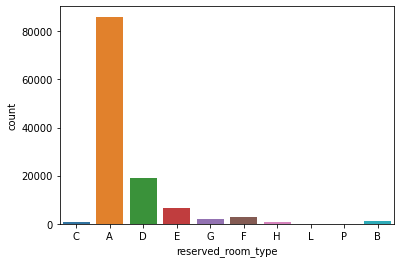

In [12]:
sns.countplot(data=df, x = 'reserved_room_type')
plt.show()

In [13]:
char = df.select_dtypes(include='object')
for i in char:
    print(i , df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926
name 81503
email 115889
phone-number 119390
credit_card 9000


In [14]:
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace=True)

le=LabelEncoder()
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day
df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

hotel 2
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
name 81503
email 115889
phone-number 119390
credit_card 9000


In [15]:
for i in cat_list:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

# Split the dataset

In [16]:
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=46,test_size=0.3)

# Feature Scaling

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using logistic Regression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred_log = log_reg.predict(X_test)
acc_log= accuracy_score(pred_log,y_test)
print ('Test Accuracy : {:.2f}%'.format(acc_log*100))
print(classification_report(y_test,pred_log))

Test Accuracy : 81.48%
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     22585
           1       0.89      0.57      0.69     13232

    accuracy                           0.81     35817
   macro avg       0.84      0.76      0.78     35817
weighted avg       0.83      0.81      0.80     35817



# Using Decision Tree Classifier

In [19]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print ('Test Accuracy : {:.2f}%'.format(acc_dtc*100))
print(classification_report(y_test, y_pred_dtc))


Test Accuracy : 93.37%
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     22585
           1       0.90      0.92      0.91     13232

    accuracy                           0.93     35817
   macro avg       0.93      0.93      0.93     35817
weighted avg       0.93      0.93      0.93     35817



# Random Forest Classifier

In [20]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)
acc_rfc = accuracy_score(pred_rfc, y_test)
print ('Test Accuracy : {:.2f}%'.format(acc_rfc*100))
print(classification_report(pred_rfc, y_test))

Test Accuracy : 93.86%
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     24299
           1       0.85      0.98      0.91     11518

    accuracy                           0.94     35817
   macro avg       0.92      0.95      0.93     35817
weighted avg       0.95      0.94      0.94     35817



# AdaBoost Classifier

In [21]:
model_adaB = AdaBoostClassifier(learning_rate=0.5)
model_adaB.fit(X_train, y_train)
pred_adaB = model_adaB.predict(X_test)
acc_adaB = accuracy_score(y_test, pred_adaB)
print ('Test Accuracy : {:.2f}%'.format(acc_adaB*100))
print(classification_report(pred_adaB, y_test))

Test Accuracy : 82.06%
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26243
           1       0.62      0.86      0.72      9574

    accuracy                           0.82     35817
   macro avg       0.78      0.83      0.79     35817
weighted avg       0.85      0.82      0.83     35817



<AxesSubplot:>

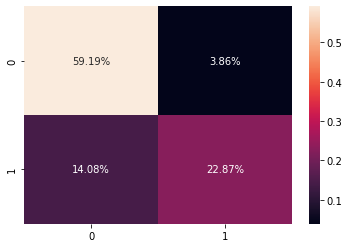

In [22]:
cf_matrix_adaB = confusion_matrix(y_test, pred_adaB)
sns.heatmap(cf_matrix_adaB/np.sum(cf_matrix_adaB), annot=True,fmt= '0.2%')


# KNeighbours Classifier

In [23]:
model_neigh = KNeighborsClassifier()
model_neigh.fit(X_train, y_train)
pred_neigh = model_neigh.predict(X_test)
acc_neigh = accuracy_score(y_test, pred_neigh)
print ('Test Accuracy : {:.2f}%'.format(acc_neigh*100))
print(classification_report(pred_neigh, y_test))

Test Accuracy : 85.99%
              precision    recall  f1-score   support

           0       0.95      0.85      0.89     25172
           1       0.71      0.89      0.79     10645

    accuracy                           0.86     35817
   macro avg       0.83      0.87      0.84     35817
weighted avg       0.88      0.86      0.86     35817



In [24]:
output = pd.DataFrame({"Model":['Logistic Regression','KNeighborsClassifier',
                                'Decision Tree Classifier','RandomForestClassifier',
                               'AdaBoostClassifier'],
                      "Accuracy":[acc_log, acc_neigh, acc_dtc, acc_rfc, acc_adaB]})

output

,Model,Accuracy
0,Logistic Regression,0.814781
1,KNeighborsClassifier,0.859871
2,Decision Tree Classifier,0.933663
3,RandomForestClassifier,0.938577
4,AdaBoostClassifier,0.820588


# Findingout the best model

<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

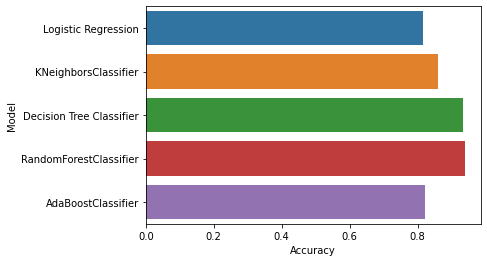

In [25]:
sns.barplot(x='Accuracy', y='Model', data=output)

On comparing the accuracies of the above models, I found that Random forest classifier has the most accuracy